In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from scipy.stats import chisquare
import scipy.cluster.hierarchy as shc

In [2]:
# Change the working directory
new_directory = "C:/documents/UOL/ST 3189 Machine Learning/Coursework"
os.chdir(new_directory)

In [13]:
DHI = pd.read_csv("diabetes health indicator.csv")

# Summary and column names
print(DHI.describe())
print(DHI.columns)

# Remove NAs
DHI = DHI.dropna()
print(DHI.isna().sum())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [41]:
DHI_1 = DHI.copy()
diabetes_02_index = DHI_1[DHI_1['Diabetes_012'] == 2].index
DHI_1.loc[diabetes_02_index, 'Diabetes_012'] = 1
print(DHI_1['Diabetes_012'].value_counts())

0    213703
1     39977
Name: Diabetes_012, dtype: int64


In [42]:
# Fix target variable imbalance
#combine prediabetes with diabetes as 1
DHI_1['Diabetes_012'] = np.where(DHI_1['Diabetes_012'] == 2, 1, DHI_1['Diabetes_012'])


In [43]:
mapping = {5: 1, 4: 2,3: 3, 2: 4, 1: 5}

# Replace values in GenHlth column using mapping dictionary
DHI_1['GenHlth'] = DHI_1['GenHlth'].map(mapping)

In [ ]:
DHI_1= pd.concat([DHI_1, DHI_1['Mapped_GenHlth']], axis=1)

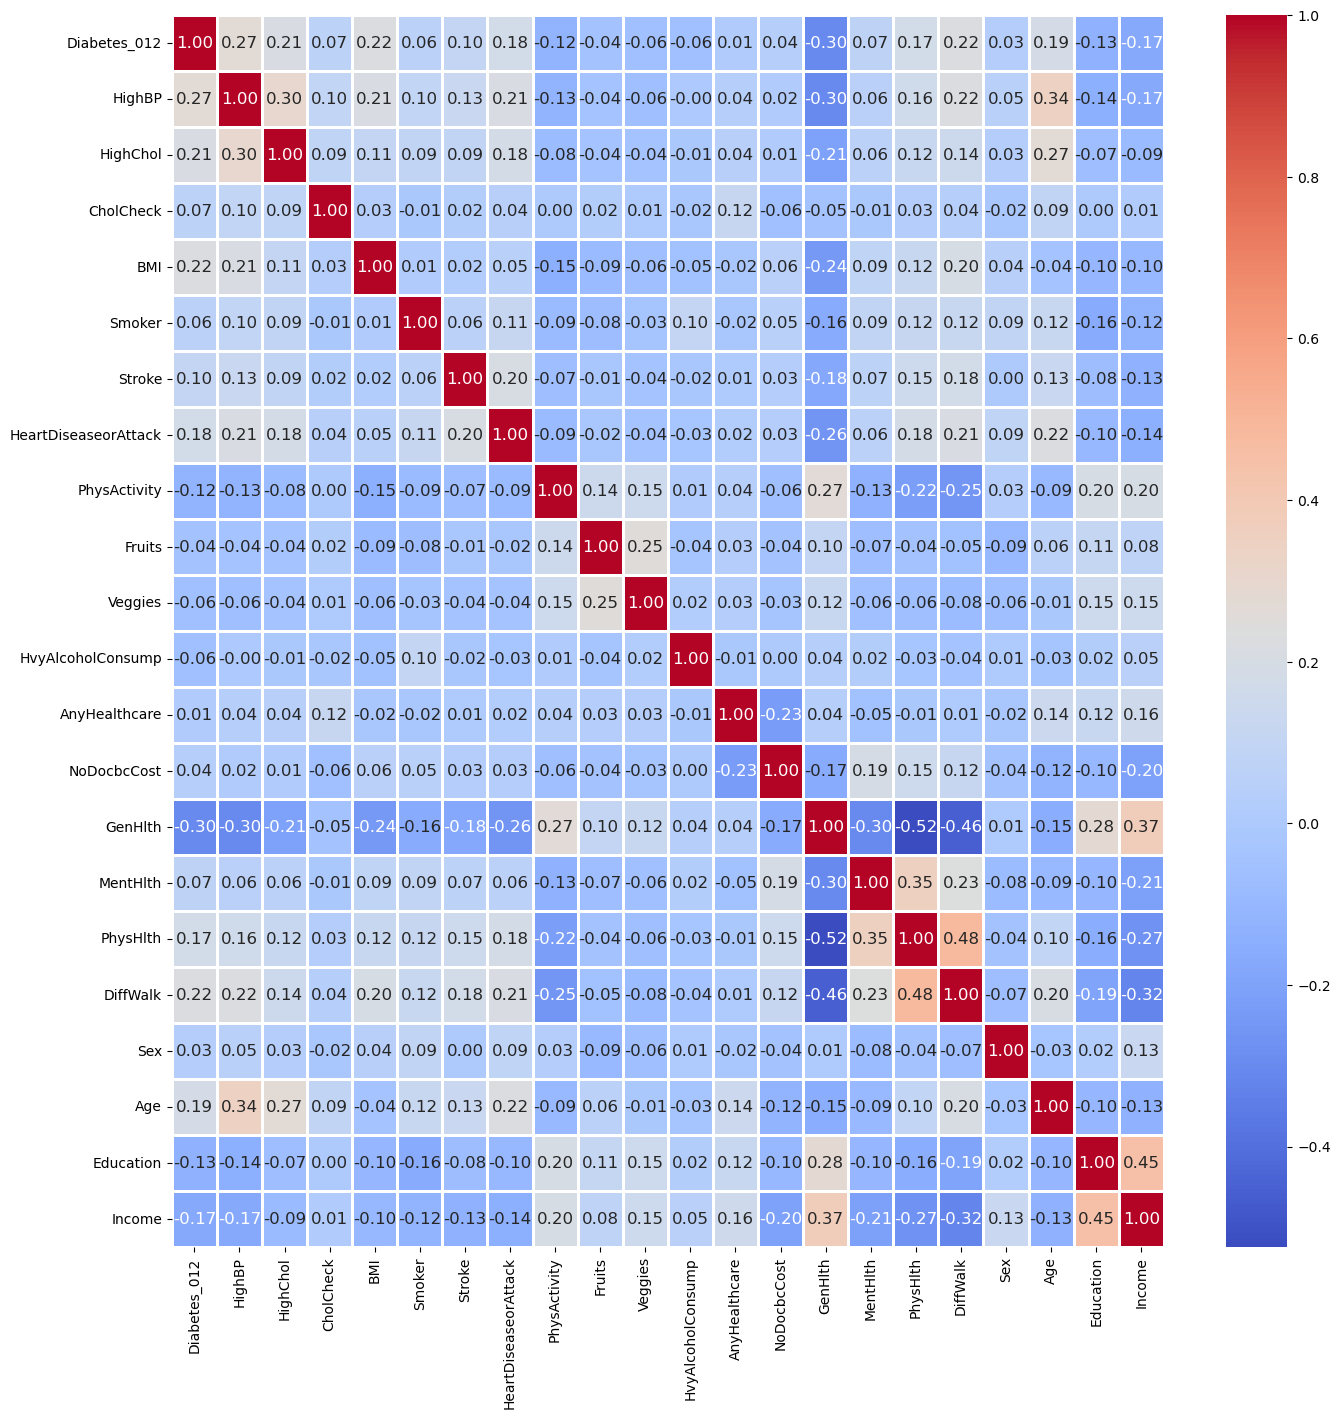

In [45]:
# Correlation plot
cor_matrix = DHI_1.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(cor_matrix, annot=True, linewidths=2, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.show()

In [46]:
# Feature importance using Random Forest
predictors = DHI.drop(columns=['Diabetes_012'])
target = DHI['Diabetes_012']
data = StandardScaler().fit_transform(predictors)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=3187)


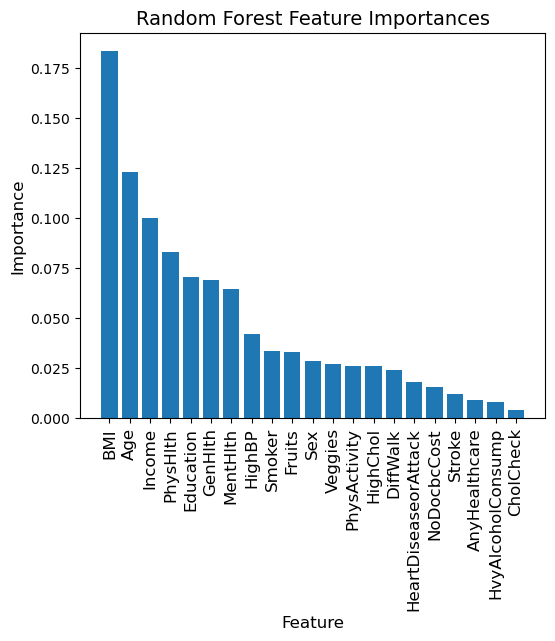

In [47]:
# Random Forest for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=3187)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = list(predictors.columns)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(6, 5))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation='vertical', fontsize= 12) 
plt.xlabel("Feature", fontsize=12)  
plt.ylabel("Importance", fontsize=12)  
plt.title("Random Forest Feature Importances", fontsize=14)  
plt.show()

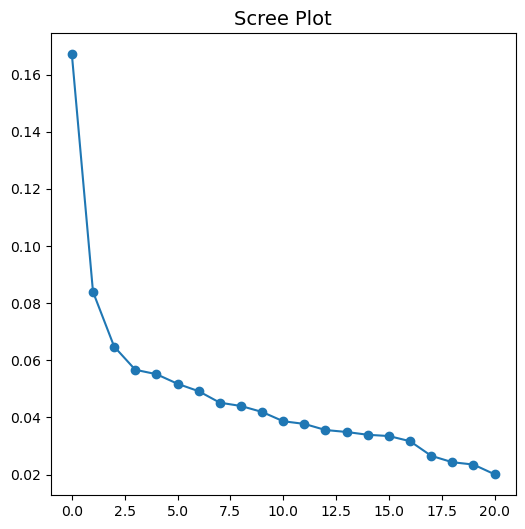

In [48]:
pca_data = data
pca_result = PCA().fit(pca_data)

# Scree Plot
plt.figure(figsize=(6, 6))
plt.plot(pca_result.explained_variance_ratio_, marker='o')
plt.title("Scree Plot", fontsize=14)
plt.show()

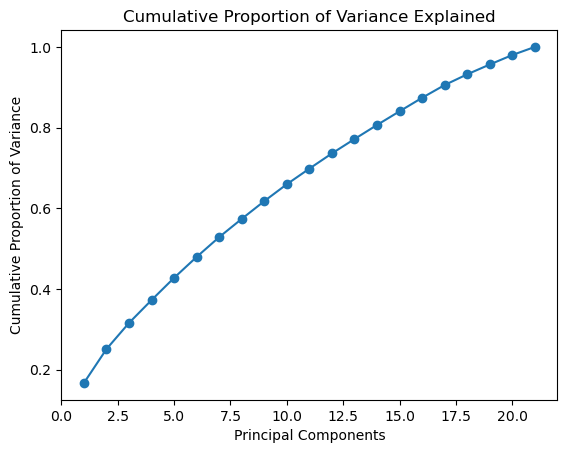

In [49]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data)
# Cumulative proportion of variance explained
cum_prop_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, len(cum_prop_var) + 1), cum_prop_var, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Proportion of Variance')
plt.title('Cumulative Proportion of Variance Explained')
plt.show()

In [67]:
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Add variable names from the original dataset
pca_df.columns = predictors.columns  

print(pca_df.head())


     HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0  4.775692  0.432141   0.335664 -1.457618 -0.236566 -0.586421   
1  0.572926  5.459159  -1.556650  3.657566  0.095634  1.588772   
2  4.941320  1.795866   2.024814 -2.017571  0.514281 -0.042157   
3 -0.346491 -0.671372   0.472065  1.069961 -1.979522 -0.033149   
4 -0.162755 -1.328538   0.849492  0.903462 -1.347847  0.271088   

   HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  AnyHealthcare  \
0              1.570326      0.964589 -0.131766 -0.217164  ...       1.070699   
1             -1.068287      0.978154  3.084807 -1.675913  ...       0.425214   
2              0.376200     -1.098416  1.249624 -2.073682  ...      -0.590933   
3              0.644996      0.138332 -0.306873  0.577530  ...      -0.807366   
4              0.823575     -0.573413  0.764568 -0.702625  ...      -0.367104   

   NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk       Sex       Age  \
0     0.027713 -0.936558 -0.631151  0.

In [51]:
pca_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,4.775692,0.432141,0.335664,-1.457618,-0.236566,-0.586421,1.570326,0.964589,-0.131766,-0.217164,...,1.070699,0.027713,-0.936558,-0.631151,0.108127,0.242544,0.345756,0.412942,0.053094,-0.667989
1,0.572926,5.459159,-1.556650,3.657566,0.095634,1.588772,-1.068287,0.978154,3.084807,-1.675913,...,0.425214,0.409569,1.990072,-0.582117,1.890264,-0.029968,0.054740,0.504112,-1.659185,-0.353699
2,4.941320,1.795866,2.024814,-2.017571,0.514281,-0.042157,0.376200,-1.098416,1.249624,-2.073682,...,-0.590933,-1.319285,1.221134,1.576373,-1.018900,0.358217,-0.407793,-1.643732,1.773264,-0.360413
3,-0.346491,-0.671372,0.472065,1.069961,-1.979522,-0.033149,0.644996,0.138332,-0.306873,0.577530,...,-0.807366,0.027320,0.080733,-0.202221,-0.651570,1.000094,-0.337392,-0.953503,0.952883,0.169990
4,-0.162755,-1.328538,0.849492,0.903462,-1.347847,0.271088,0.823575,-0.573413,0.764568,-0.702625,...,-0.367104,-0.375454,-0.409891,-0.026244,-0.392768,0.404071,0.086956,0.564743,-0.267521,0.240661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.322016,-0.784542,-0.402505,-2.159522,0.213879,2.195820,1.136544,1.089572,0.393611,1.021637,...,0.403772,-0.660018,-0.588712,1.005463,-0.574806,-0.146271,-0.591034,0.610699,-0.620910,0.265546
253676,3.188499,-0.147713,-1.594559,0.366344,-3.042314,-1.705754,0.058580,-0.359699,0.838779,-0.708066,...,-0.844382,-0.488501,-0.275876,-0.504789,-0.892524,-0.541683,-0.368510,0.307805,1.936669,-1.394473
253677,-1.305552,1.716696,-0.151111,-0.218830,-1.954317,-0.514357,-0.634881,-0.886530,-0.195335,0.497469,...,-1.016935,0.007616,0.425163,1.435166,0.624900,-0.564499,-0.020172,1.696455,-0.363095,0.961676
253678,0.463935,0.126764,-0.144657,0.465264,-1.286683,0.125135,-0.077389,0.673061,-0.602743,0.630923,...,-0.856889,-0.661950,-0.300377,0.195911,-1.712274,1.234262,-0.354703,1.988460,-1.339420,-0.115858


Optimal Number of Neighbors (k): 20


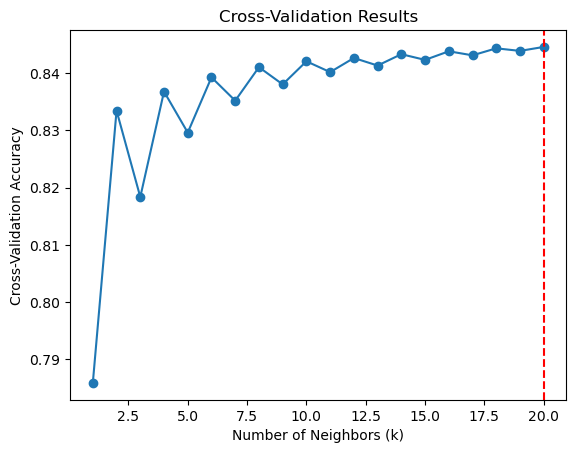

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k_aim = target.astype('category')
k_df = pd.concat([pd.DataFrame(data), k_aim], axis=1)
folds_num = 10
k_grid = range(1, 21)
cv_results = []

for k in k_grid:
    np.random.seed(3187)

    fold_accuracies = []
    for fold in range(folds_num):
        # Split the data into training and validation sets
        train_data, validation_data = train_test_split(k_df, test_size=0.2)
        # Perform KNN analysis with the current k value
        knn_result = KNeighborsClassifier(n_neighbors=k).fit(
            train_data.iloc[:, :-1], train_data.iloc[:, -1]
        )
        # Calculate accuracy for the fold
        fold_accuracies.append(
            accuracy_score(validation_data.iloc[:, -1], knn_result.predict(validation_data.iloc[:, :-1]))
        )

    # Calculate average accuracy across folds for the current k value
    cv_results.append(np.mean(fold_accuracies))

# Find the optimal k based on cross-validation result
optimal_k = np.argmax(cv_results) + 1
print(f"Optimal Number of Neighbors (k): {optimal_k}")

# Plot the cross-validation results
plt.plot(k_grid, cv_results, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Cross-Validation Results")
plt.axvline(x=optimal_k, color='red', linestyle='--')
plt.show()

In [16]:
# Find the optimal k based on cross-validation result
optimal_k = k_grid[np.argmax(cv_results)]
print("Optimal Number of Neighbors (k):", optimal_k)

Optimal Number of Neighbors (k): 20


In [18]:
# K-Means
kmeans = KMeans(n_clusters=20, random_state=3187)
clusters = kmeans.fit_predict(data)

C:\Users\User\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Reduce dimensions for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data)

In [53]:
# Hierarchical Clustering
sub_DHI = DHI.sample(frac=0.3, replace=True, random_state=3187)
scaled_data = StandardScaler().fit_transform(sub_DHI.drop("Diabetes_012", axis=1))

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=3187)

# K-Nearest Neighbors (KNN) Classification
k = 20
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors (KNN) Classification with k={k}:")
print("Accuracy:", accuracy)

K-Nearest Neighbors (KNN) Classification with k=20:
Accuracy: 0.8427152317880795


C:\Users\User\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\clust

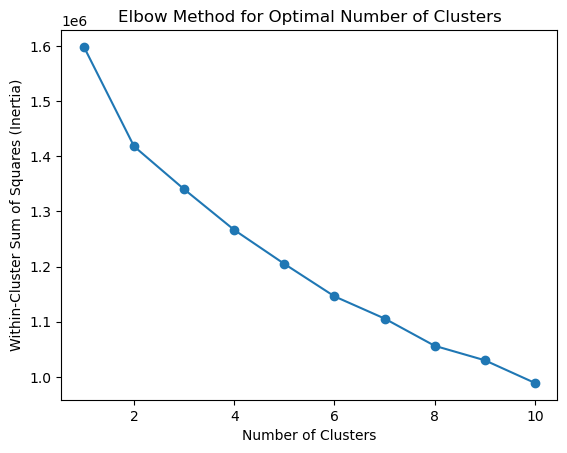

In [25]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
max_clusters = 10 

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=3187)
    kmeans.fit(scaled_data)
    
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

C:\Users\User\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


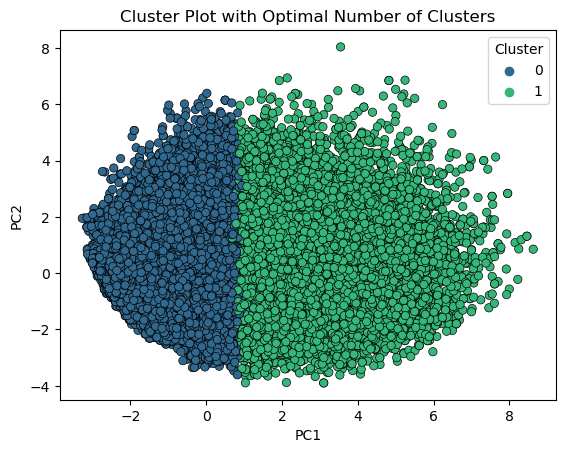

In [54]:
# Choose the optimal number of clusters (elbow point)
optimal_clusters = 2

# Apply K-Means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=3187)
clusters_optimal = kmeans_optimal.fit_predict(scaled_data)

# Reduce dimensions for visualization 
pca = PCA(n_components=2)
X_pca_optimal = pca.fit_transform(scaled_data)

# Visualize clusters using Seaborn cluster plot
cluster_df = pd.DataFrame(data={'Cluster': clusters_optimal, 'PC1': X_pca_optimal[:, 0], 'PC2': X_pca_optimal[:, 1]})
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=cluster_df, palette='viridis', marker='o', edgecolor='k')
plt.title('Cluster Plot with Optimal Number of Clusters')
plt.show()

In [55]:
sub1 = DHI.drop(columns=['Diabetes_012']).copy()

# Group the variables
sub1['LifestyleFactors'] = sub1[['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']].mean(axis=1)
sub1['HealthFactors'] = sub1[['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']].mean(axis=1)
sub1['OverallHealth'] = sub1[['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']].mean(axis=1)
sub1['Demographic'] = sub1 [['Sex', 'Age', 'Education','Income']].mean(axis=1)
# Drop the original variables
sub1.drop(['PhysActivity', 'Fruits', 'Veggies', 'Smoker','Stroke',
           'HighBP', 'HighChol', 'HeartDiseaseorAttack','DiffWalk','PhysHlth',
           'GenHlth', 'MentHlth','Sex', 'Age', 'Education','Income','CholCheck','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost'], axis=1, inplace=True)

In [56]:
sub2 = DHI.copy()
# Extract the subsets of predictors based on the specified variables
physical_activity_df = sub2[['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']]
health_factors_df = sub2[['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']]
overall_health_df = sub2[['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']]
healthcare_access_df = sub2[['NoDocbcCost', 'AnyHealthcare', 'CholCheck']]
demographics_df = sub2[['Sex', 'Age', 'Education', 'Income']]
target = sub2[['Diabetes_012']]
# Rename the columns using MultiIndex
physical_activity_df.columns = pd.MultiIndex.from_product([['LifestyleFactors'], physical_activity_df.columns])
health_factors_df.columns = pd.MultiIndex.from_product([['HealthFactors'], health_factors_df.columns])
overall_health_df.columns = pd.MultiIndex.from_product([['OverallHealth'], overall_health_df.columns])
healthcare_access_df.columns = pd.MultiIndex.from_product([['HealthcareAccess'], healthcare_access_df.columns])
demographics_df.columns = pd.MultiIndex.from_product([['Demographics'], demographics_df.columns])
target.columns = pd.MultiIndex.from_product([['Target'], target.columns])
# Combine into one DataFrame
combined_df = pd.concat([physical_activity_df, health_factors_df, overall_health_df, healthcare_access_df, demographics_df,target], axis=1)

combined_df

LifestyleFactors                                         HealthFactors  \
           PhysActivity Fruits Veggies Smoker HvyAlcoholConsump        HighBP   
0                     0      0       1      1                 0             1   
1                     1      0       0      1                 0             0   
2                     0      1       0      0                 0             1   
3                     1      1       1      0                 0             1   
4                     1      1       1      0                 0             1   
...                 ...    ...     ...    ...               ...           ...   
253675                0      1       1      0                 0             1   
253676                0      0       0      0                 0             1   
253677                1      1       0      0                 0             0   
253678                0      1       1      0                 0             1   
253679                1      1       0      0                 0             1   

                                            OverallHealth  ...           \
       HighChol HeartDiseaseorAttack Stroke       GenHlth  ... PhysHlth   
0             1                    0      0             5  ...       15   
1             0                    0      0             3  ...        0   
2             1                    0      0             5  ...       30   
3             0                    0      0             2  ...        0   
4             1                    0      0             2  ...        0   
...         ...                  ...    ...           ...  ...      ...   
253675        1                    0      0             3  ...        5   
253676        1                    0      0             4  ...        0   
253677        0                    0      0             1  ...        0   
253678        0                    0      0             3  ...        0   
253679        1                    1      0             2  ...        0   

                HealthcareAccess                         Demographics      \
       DiffWalk      NoDocbcCost AnyHealthcare CholCheck          Sex Age   
0             1                0             1         1            0   9   
1             0                1             0         0            0   7   
2             1                1             1         1            0   9   
3             0                0             1         1            0  11   
4             0                0             1         1            0  11   
...         ...              ...           ...       ...          ...  ..   
253675        0                0             1         1            1   5   
253676        1                0             1         1            0  11   
253677        0                0             1         1            0   2   
253678        0                0             1         1            1   7   
253679        0                0             1         1            0   9   

                              Target  
       Education Income Diabetes_012  
0              4      3            0  
1              6      1            0  
2              4      8            0  
3              3      6            0  
4              5      4            0  
...          ...    ...          ...  
253675         6      7            0  
253676         2      4            2  
253677         5      2            0  
253678         5      1            0  
253679         6      2            2  

[253680 rows x 21 columns]

In [57]:
Health = sub2[['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk','HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']]
Lifestyle_Demo = sub2[['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump','Sex', 'Age', 'Education', 'Income']]
Body_Index = sub2[['BMI']]

Health_with_diabetes = pd.concat([Health, DHI_1['Diabetes_012']], axis=1)
Lifestyle_with_diabetes = pd.concat([Lifestyle_Demo, DHI_1['Diabetes_012']], axis=1)
BMI_with_diabetes = pd.concat([Body_Index, DHI_1['Diabetes_012']], axis=1)


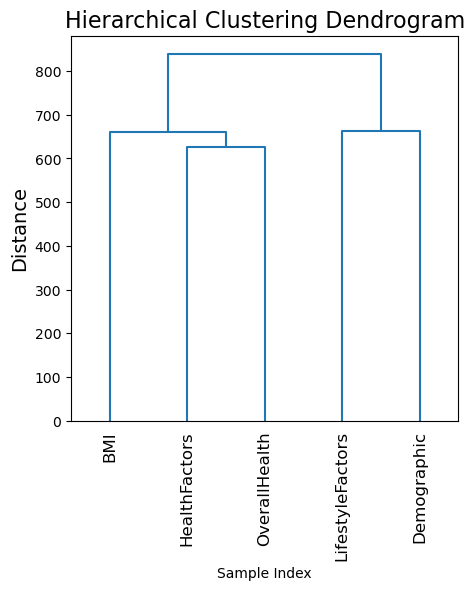

In [58]:
# 1. Standardize the data
scaler = StandardScaler()
sub1_scaled = scaler.fit_transform(sub1)

# 2. Compute the linkage matrix using hierarchical clustering
linkage_matrix = linkage(sub1_scaled.T, method='ward')

# 3. Plot the dendrogram
plt.figure(figsize=(5, 5))
dendrogram(linkage_matrix, labels=sub1.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16) 
plt.xlabel('Sample Index', fontsize = 10)  
plt.ylabel('Distance', fontsize=14)  
plt.show()

Classification

In [59]:
# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix_display(conf_matrix, model_name, font_size=12):
    plt.rcParams.update({'font.size': font_size})
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['0', '1'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [60]:
# Split data into features (X) and target (y)
hX = Health_with_diabetes.drop(columns=['Diabetes_012'])
hy = Health_with_diabetes['Diabetes_012']

# Split data into training and testing sets
hX_train, hX_test, hy_train, hy_test = train_test_split(hX, hy, test_size=0.3, random_state=3189)

def train_fcn_h(model, hX_train, hX_test, hy_train, hy_test):
    # Train the model
    model.fit(hX_train, hy_train)
    
    # Predict on the test set
    hy_pred = model.predict(hX_test)
    
    # Evaluate the model
    accuracy = accuracy_score(hy_test, hy_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    precision = precision_score(hy_test, hy_pred)
    print(f"Precision: {precision:.2f}")
    
    f1 = f1_score(hy_test, hy_pred)
    print(f"F1 Score: {f1:.2f}")
    
    # Compute and print confusion matrix
    cm = confusion_matrix(hy_test, hy_pred)
    plot_confusion_matrix_display(cm, model.__class__.__name__, font_size = 14)

In [61]:
lX = Lifestyle_with_diabetes.drop(columns=['Diabetes_012'])
ly = Lifestyle_with_diabetes['Diabetes_012']

# Split data into training and testing sets
lX_train, lX_test, ly_train, ly_test = train_test_split(lX, ly, test_size=0.3, random_state=3189)
                                                    
def train_fcn_l(model, lX_train, lX_test, ly_train, ly_test):
    # Train the model
    model.fit(lX_train, ly_train)
    
    # Predict on the test set
    ly_pred = model.predict(lX_test)
    
    # Evaluate the model
    accuracy = accuracy_score(ly_test, ly_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    precision = precision_score(ly_test, ly_pred)
    print(f"Precision: {precision:.2f}")
    
    f1 = f1_score(ly_test, ly_pred)
    print(f"F1 Score: {f1:.2f}")
    
    # Compute and print confusion matrix
    cm = confusion_matrix(ly_test, ly_pred)
    plot_confusion_matrix_display(cm, model.__class__.__name__, font_size = 14)

In [62]:
BX = BMI_with_diabetes.drop(columns=['Diabetes_012'])
By = BMI_with_diabetes['Diabetes_012']

# Split data into training and testing sets
BX_train, BX_test, By_train, By_test = train_test_split(BX, By, test_size=0.3, random_state=3189)
                                                    
def train_fcn_B(model, BX_train, BX_test, By_train, By_test):
    # Train the model
    model.fit(BX_train, By_train)
    
    # Predict on the test set
    By_pred = model.predict(BX_test)
    
    # Evaluate the model
    accuracy = accuracy_score(By_test, By_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    precision = precision_score(By_test, By_pred)
    print(f"Precision: {precision:.2f}")
    
    f1 = f1_score(By_test, By_pred)
    print(f"F1 Score: {f1:.2f}")
    
    # Compute and print confusion matrix
    cm = confusion_matrix(By_test, By_pred) 
    plot_confusion_matrix_display(cm, model.__class__.__name__, font_size = 14)

Health_with_diabetes:
Model: LogisticRegression
Accuracy: 0.84
Precision: 0.50
F1 Score: 0.22


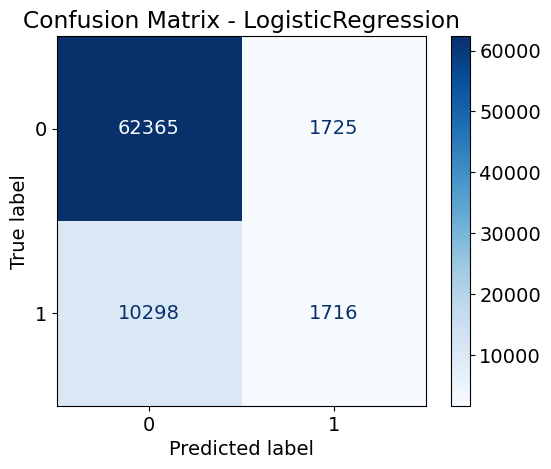

Model: RandomForestClassifier
Accuracy: 0.84
Precision: 0.45
F1 Score: 0.20


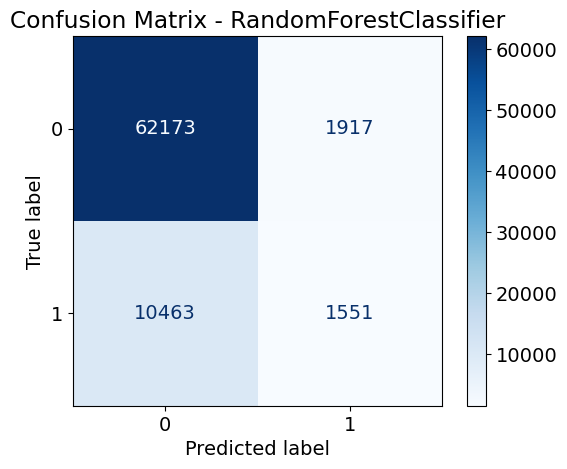

Model: DecisionTreeClassifier
Accuracy: 0.84
Precision: 0.45
F1 Score: 0.19


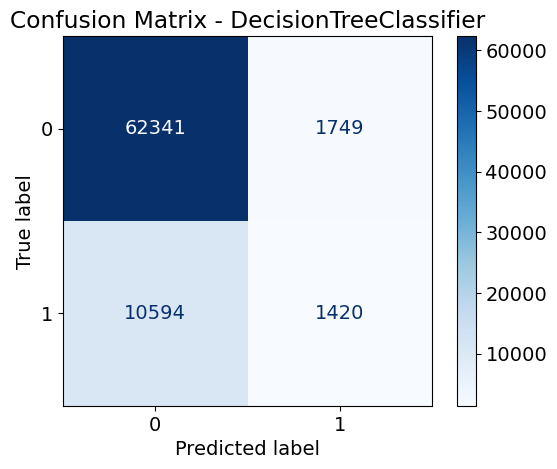

In [63]:

# Train and evaluate models for Health_with_diabetes
print("Health_with_diabetes:")
for model in [LogisticRegression(random_state=3189), RandomForestClassifier(random_state=3189),DecisionTreeClassifier(random_state=3189)]:
    print(f"Model: {model.__class__.__name__}")
    
    train_fcn_h(model, hX_train, hX_test, hy_train, hy_test)


Lifestyle_with_diabetes:
Model: LogisticRegression
Accuracy: 0.84
Precision: 0.35
F1 Score: 0.02


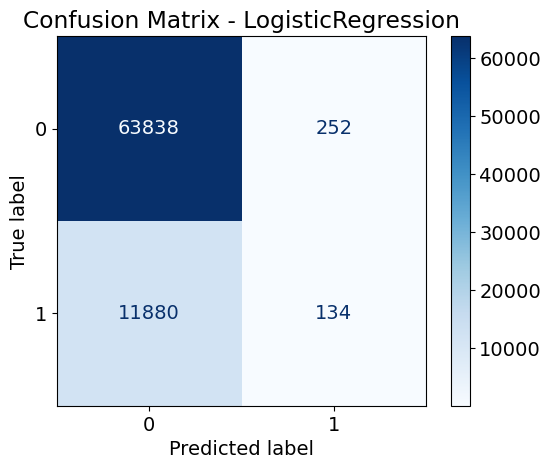

Model: RandomForestClassifier
Accuracy: 0.83
Precision: 0.33
F1 Score: 0.11


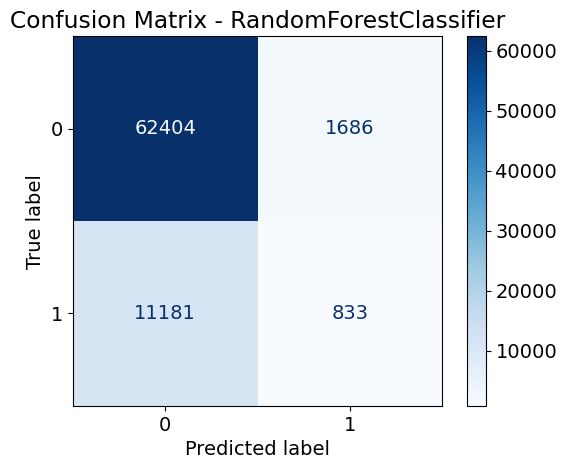

Model: DecisionTreeClassifier
Accuracy: 0.83
Precision: 0.32
F1 Score: 0.10


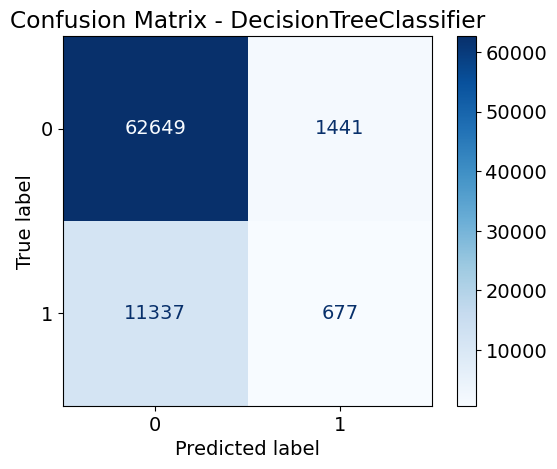

In [64]:
# Train and evaluate models for Lifestyle_with_diabetes
print("\nLifestyle_with_diabetes:")
for model in [LogisticRegression(random_state=3189), RandomForestClassifier(random_state=3189),DecisionTreeClassifier(random_state=3189)]:
    print(f"Model: {model.__class__.__name__}")
    train_fcn_l(model, lX_train,lX_test, ly_train, ly_test)


BMI_with_diabetes:
Model: LogisticRegression
Accuracy: 0.84
Precision: 0.35
F1 Score: 0.04


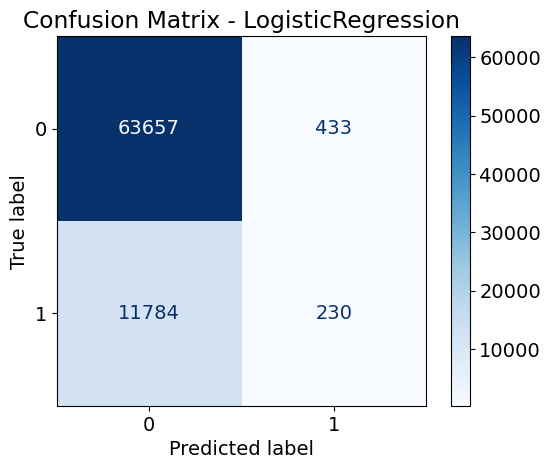

Model: RandomForestClassifier
Accuracy: 0.84
Precision: 0.43
F1 Score: 0.00


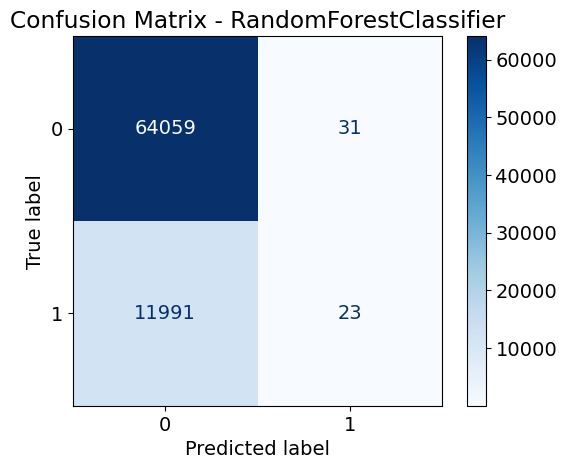

Model: DecisionTreeClassifier
Accuracy: 0.84
Precision: 0.50
F1 Score: 0.00


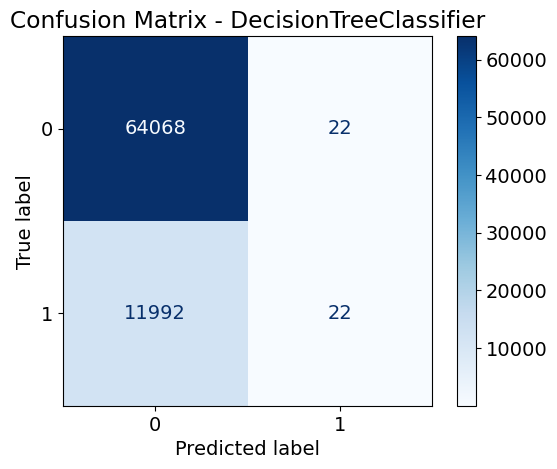

In [65]:
# Train and evaluate models for BMI_with_diabetes
print("\nBMI_with_diabetes:")
for model in [LogisticRegression(random_state=3189), RandomForestClassifier(random_state=3189),DecisionTreeClassifier(random_state=3189)]:
    print(f"Model: {model.__class__.__name__}")
    train_fcn_B(model, BX_train,BX_test, By_train, By_test)

Feature Importance for Health_with_diabetes:


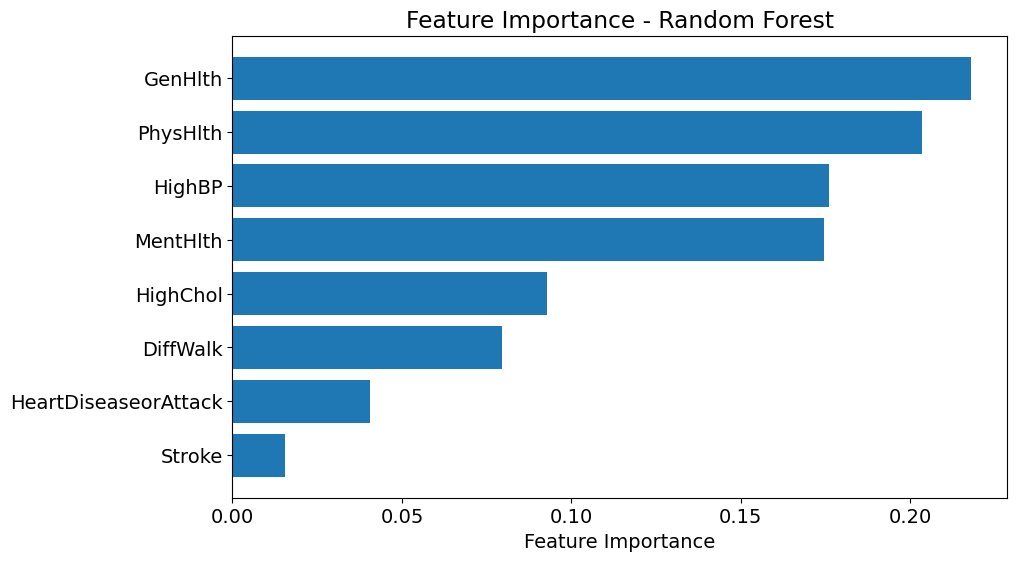


Feature Importance for Lifestyle_with_diabetes:


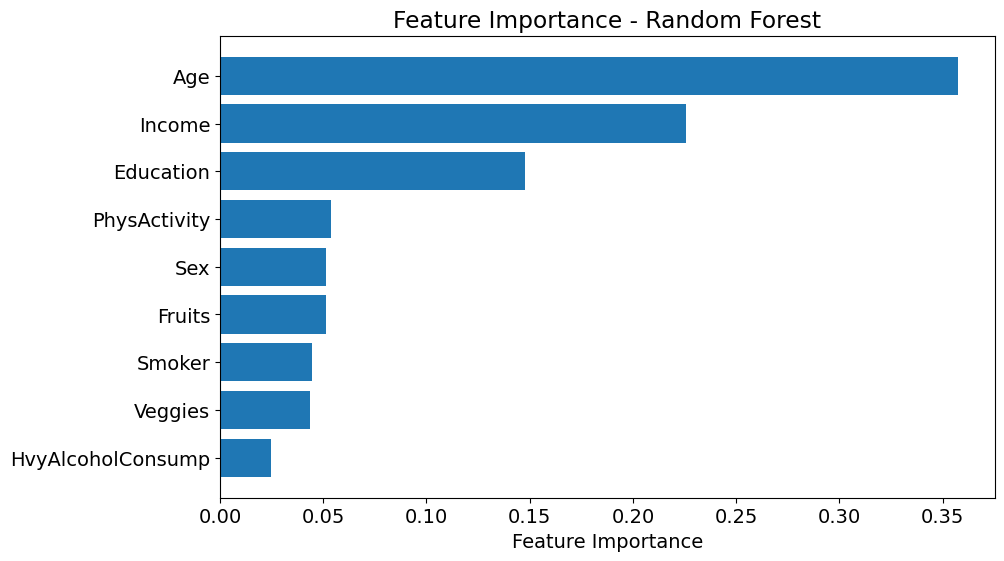

In [66]:
# Function to train Random Forest and plot feature importance
def train_random_forest(df):
    # Split data into features (X) and target (y)
    X = df.drop(columns=['Diabetes_012'])
    y = df['Diabetes_012']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize Random Forest classifier
    model = RandomForestClassifier(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_names = X.columns
    sorted_idx = feature_importance.argsort()
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance - Random Forest')
    plt.show()

# Train Random Forest and plot feature importance for Health_with_diabetes
print("Feature Importance for Health_with_diabetes:")
train_random_forest(Health_with_diabetes)

# Train Random Forest and plot feature importance for Lifestyle_with_diabetes
print("\nFeature Importance for Lifestyle_with_diabetes:")
train_random_forest(Lifestyle_with_diabetes)

Classification

               Predictor  Coefficient  Odds Ratio
0                 HighBP     0.356001    1.427608
1               HighChol     0.290674    1.337329
2              CholCheck     0.230860    1.259683
3                    BMI     0.408587    1.504690
4                 Smoker    -0.002615    0.997388
5                 Stroke     0.023488    1.023766
6   HeartDiseaseorAttack     0.056271    1.057884
7           PhysActivity    -0.019534    0.980655
8                 Fruits    -0.021110    0.979111
9                Veggies    -0.010153    0.989898
10     HvyAlcoholConsump    -0.154402    0.856928
11         AnyHealthcare     0.008333    1.008367
12           NoDocbcCost     0.015592    1.015714
13               GenHlth     0.544797    1.724259
14              MentHlth    -0.013760    0.986334
15              PhysHlth    -0.063072    0.938876
16              DiffWalk     0.045748    1.046810
17                   Sex     0.119543    1.126981
18                   Age     0.378684    1.460362


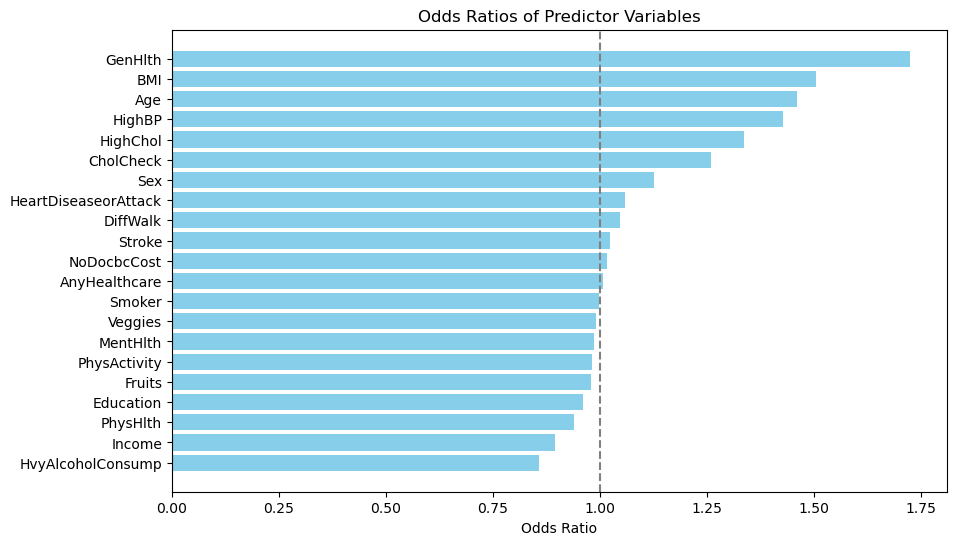

In [30]:
# Get column names and coefficients
column_names = DHI_1.drop(columns=['Diabetes_012']).columns
coefficients = logistic_model.coef_[0]

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display the coefficients and odds ratios
coef_df = pd.DataFrame({'Predictor': column_names, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})
print(coef_df)

# Sort the DataFrame by 'Odds Ratio' in descending order
coef_df_sorted = coef_df.sort_values(by='Odds Ratio', ascending= True)

# Plotting the odds ratios
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Predictor'], coef_df_sorted['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.title('Odds Ratios of Predictor Variables')
plt.axvline(x=1, color='gray', linestyle='--')  # Add a vertical line at odds ratio = 1
plt.show()

In [73]:
INS = pd.read_csv("insurance.csv")
# Summary and column names
print(INS.describe())
print(INS.columns)

# Remove NAs
INS = INS.dropna()

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [74]:
INS[['sex', 'smoker', 'region']] = INS[['sex', 'smoker', 'region']].astype('category')
INS.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [75]:
label = LabelEncoder()
label.fit(INS.sex.drop_duplicates())
INS.sex = label.transform(INS.sex)
label.fit(INS.smoker.drop_duplicates())
INS.smoker = label.transform(INS.smoker)
label.fit(INS.region.drop_duplicates())
INS.region = label.transform(INS.region)
INS.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

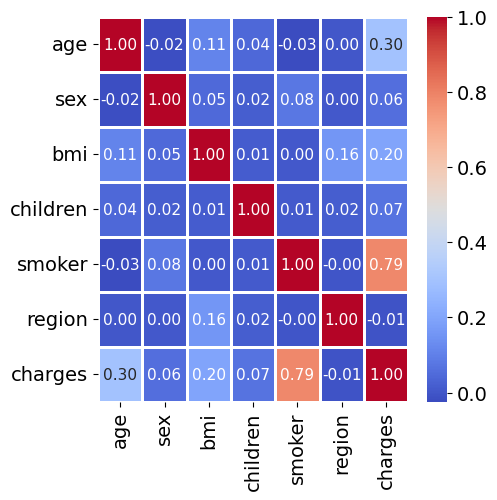

In [76]:
# Correlation plot
cor_matrix_INS = INS.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(cor_matrix_INS , annot=True, linewidths=2,cmap='coolwarm', fmt=".2f",annot_kws={"size": 11})
plt.show()

In [170]:
X = INS.drop(columns=['charges'])  # Predictor variables excluding BMI and Outcome
y = INS['charges']  # Target variable

In [171]:
# Standardize predictor variables"
X_scaled = StandardScaler().fit_transform(X)

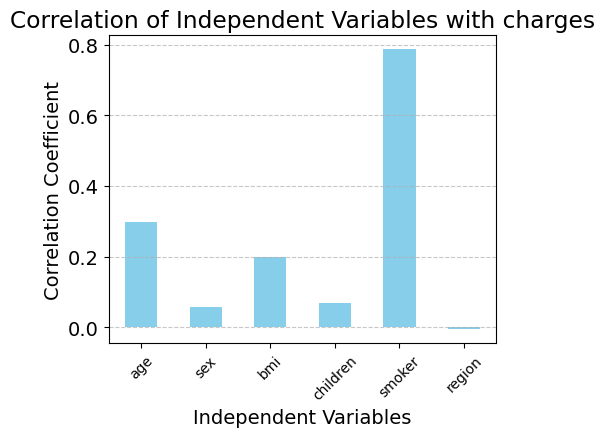

In [172]:
corr_with_y = X.corrwith(INS['charges'])
plt.figure(figsize=(5, 4))
corr_with_y.plot(kind='bar', color='skyblue')
plt.title('Correlation of Independent Variables with charges')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, fontsize = 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

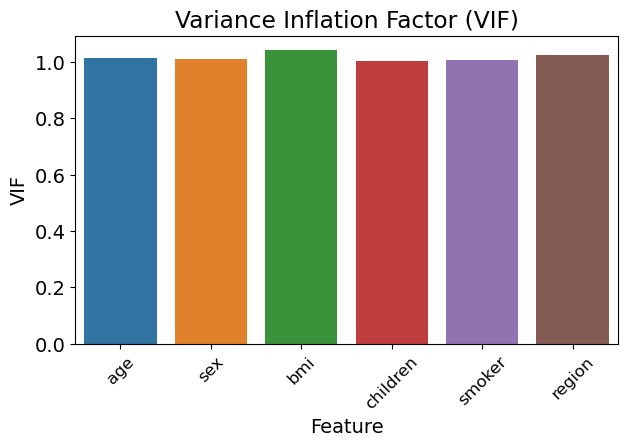

In [173]:
# Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

plt.figure(figsize=(7,4))
sns.barplot(x="Feature", y="VIF", data=vif)
plt.title("Variance Inflation Factor (VIF)")
plt.xticks(rotation=45, fontsize =12)
plt.show()

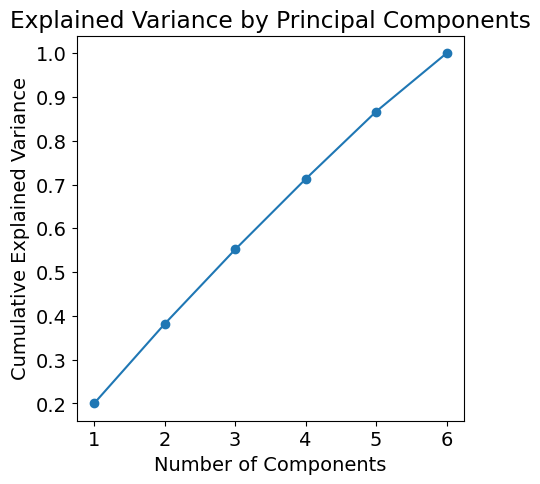

In [165]:
pca = PCA().fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
components_with_high_variance = np.where(explained_variance_ratio > 0.1)[0]

plt.figure(figsize=(5, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [147]:
X = INS.drop(columns=['charges']) # Independent variable
y = INS['charges']     # Dependent variable

# Add constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:44:22   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.0

In [42]:
# Setup the regression training environment
target_rgs = INS['charges']
data_rgs= StandardScaler().fit_transform(INS.drop(columns=['charges','sex']))

X_train, X_test, y_train, y_test = train_test_split(data_rgs, target_rgs, test_size=0.3, random_state=3187)

In [43]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

print("Linear Regression Results:")
print(f"MSE: {linear_mse}")
print(f"RMSE: {linear_rmse}")
print(f"MAE: {linear_mae}")
print(f"R-squared: {linear_r2}")
print()

Linear Regression Results:
MSE: 31957968.10936024
RMSE: 5653.137899375907
MAE: 4018.4706970786383
R-squared: 0.7784059336745333



In [44]:
# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso Regression Results:")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")
print(f"MAE: {lasso_mae}")
print(f"R-squared: {lasso_r2}")

Lasso Regression Results:
MSE: 31956763.618137598
RMSE: 5653.031365394818
MAE: 4018.240738926963
R-squared: 0.7784142855230289


In [45]:
# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Results:")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"MAE: {ridge_mae}")
print(f"R-squared: {ridge_r2}")
print()

Ridge Regression Results:
MSE: 31961272.31679025
RMSE: 5653.430137252096
MAE: 4019.769826065091
R-squared: 0.7783830225570963



In [46]:
# Random Forest Regression
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression Results:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}")
print()

Random Forest Regression Results:
MSE: 21288959.405661307
RMSE: 4613.996034421932
MAE: 2727.079261279079
R-squared: 0.8523840105730451

